Importing necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Creating a Pandas dataframe and initialising data.

In [2]:
# Some random sample data for five professionals
data = pd.DataFrame({
    'professional':['X','Y','Z','S','D'],
    'organisationPrestige':[8,9,5,7,2],
    'innovative':[3,7,9,4,6],
    'education' : [5,1,2,8,3],
    'experience' : [5,13,17,6,9],
    'projectImpact' : [7,5,2,6,8],
    'problemSolving' : [2,7,9,2,5]
})

# Data
data.head()

,professional,organisationPrestige,innovative,education,experience,projectImpact,problemSolving
0,X,8,3,5,5,7,2
1,Y,9,7,1,13,5,7
2,Z,5,9,2,17,2,9
3,S,7,4,8,6,6,2
4,D,2,6,3,9,8,5


Data Visualization

<Axes: >

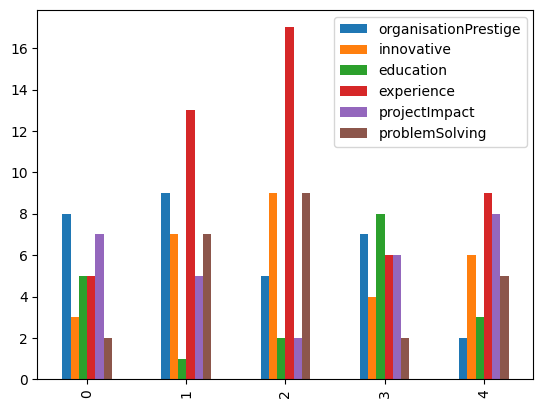

In [3]:
data.plot(kind='bar')

In [4]:
# assigned Weights for each feature
weights = {
    'organisationPrestige':0.20,
    'innovative':0.20,
    'experience':0.20,
    'education':0.15,
    'projectImpact':0.15,
    'problemSolving':0.10
}

Normalizing Data into the range [0,1] using the Min-Max Normalization method. 

In [7]:
normalisedData = data.copy()
normalisedData.drop('professional',axis=1,inplace=True)
for col in normalisedData.columns:
    normalisedData[col] = (normalisedData[col] - normalisedData[col].min())/(normalisedData[col].max()-normalisedData[col].min())

normalisedData['Professional'] = data['professional']
normalisedData.head()

,organisationPrestige,innovative,education,experience,projectImpact,problemSolving,Professional
0,0.857143,0.000000,0.571429,0.000000,0.833333,0.000000,X
1,1.000000,0.666667,0.000000,0.666667,0.500000,0.714286,Y
2,0.428571,1.000000,0.142857,1.000000,0.000000,1.000000,Z
3,0.714286,0.166667,1.000000,0.083333,0.666667,0.000000,S
4,0.000000,0.500000,0.285714,0.333333,1.000000,0.428571,D


Data plot after normalization

<Axes: >

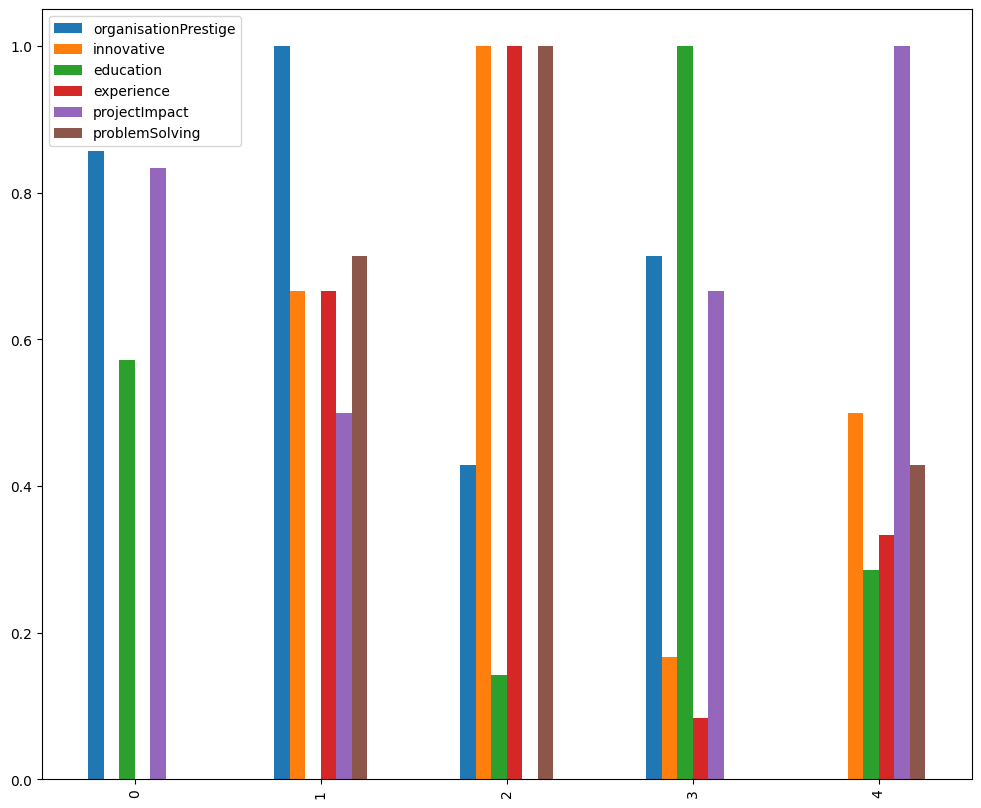

In [14]:
normalisedData.plot(kind='bar',figsize=(12,10))

In [15]:
def weightScorer(professional, theta):
    value = 0
    for feature, weight in theta.items():
        value+= professional[feature]*weight
    return value


Calculating the value of the professional based on the features and their respective weights:
1. Organisational Prestige - 20% 
2. Innovative Streak - 20%
3. Work Experience - 20%
4. Education - 15%
5. Project Impact - 15%
6. Problem Solving - 10%

In [16]:
normalisedData['value'] = normalisedData.apply(weightScorer,args=(weights,), axis=1)

Final dataframe with the values for each professional based normalised Features and their respective weights.

In [17]:
normalisedData.head()

,organisationPrestige,innovative,education,experience,projectImpact,problemSolving,Professional,value
0,0.857143,0.000000,0.571429,0.000000,0.833333,0.000000,X,0.382143
1,1.000000,0.666667,0.000000,0.666667,0.500000,0.714286,Y,0.613095
2,0.428571,1.000000,0.142857,1.000000,0.000000,1.000000,Z,0.607143
3,0.714286,0.166667,1.000000,0.083333,0.666667,0.000000,S,0.442857
4,0.000000,0.500000,0.285714,0.333333,1.000000,0.428571,D,0.402381


Professional Y has the highest value according to this algorithm with the following attributes:

Organizationl Prestige - 9	 

Innovative Streak of Y(Publications, Research articles, patents, etc) - 7	

Education(One Degree) - 1	

Work Experience of - 13 years	

Major Projects with Impact - 5	

A Good Problem Solving score of - 7
